<a href="https://colab.research.google.com/github/gustavo-candidoo/dataScience/blob/main/Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center><font size="+3" color="blue"><b>Importando Bibliotecas</b></font></center>

In [ ]:
import pandasql as ps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as s
import numpy as np
from pandasql import sqldf
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### <center><font size="+3" color="blue"><b>Importando DataSet</b></font></center>

In [ ]:
url = 'https://raw.githubusercontent.com/gustavo-candidoo/dataScience/main/imoveis.csv'
imoveis = pd.read_csv(url)

In [ ]:
cores = ['red', 'blue', 'green']

### <center><font size="+3" color="blue"><b>Explorando...</b></font></center>

In [ ]:
imoveis.sample(5)

,address,district,area,bedrooms,garage,type,rent,total
4850,Avenida Professor Ascendino Reis,Vila Clementino,27,1,0,Studio e kitnet,2695,3339
7799,Rua das Caneleiras,Jardim,64,2,1,Apartamento,2070,2938
8747,Rua Charles Darwin,Vila Santa Catarina,80,2,1,Apartamento,1400,2276
239,Rua José Mandotti,Vila Augusta,25,1,1,Studio e kitnet,1800,2418
6776,Rua Palestra Itália,Perdizes,112,3,1,Apartamento,3985,5986


In [ ]:
tamanhoDf = imoveis.shape
print(f"O Dataset possui {tamanhoDf[0]} linhas e {tamanhoDf[1]} colunas.")

O Dataset possui 11657 linhas e 8 colunas.


In [ ]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


### <center><font size="+3" color="blue"><b>Verificando Missings</b></font></center>

In [ ]:
imoveis.isna().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

### <center><font size="+3" color="blue"><b>Filtrando Dados</b></font></center>

In [ ]:
imoveis.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
imoveis[imoveis['area'] == 0]

,address,district,area,bedrooms,garage,type,rent,total
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


In [ ]:
imoveis[imoveis['district'] == 'Morumbi'].describe()

,area,bedrooms,garage,rent,total
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,137.250000,2.900000,2.200000,4412.950000,5837.200000
std,108.942706,1.165287,1.704483,2963.450931,3659.972585
min,0.000000,1.000000,0.000000,1300.000000,1900.000000
25%,59.750000,2.000000,1.000000,1917.500000,2267.500000
50%,82.000000,3.000000,2.000000,4015.000000,5556.500000
75%,222.000000,4.000000,3.250000,5716.250000,8638.750000
max,380.000000,5.000000,6.000000,12470.000000,13790.000000


In [ ]:
imoveisMorumbi = imoveis[imoveis['district'] == 'Morumbi']
medianaAreaMorumbi = imoveisMorumbi['area'].median()
print(f"A mediana da área do distrito Morumbi é de {medianaAreaMorumbi} metros quadrados.")

A mediana da área do distrito Morumbi é de 82.0 metros quadrados.


In [ ]:
imoveis['area'] = np.where((imoveis['area'] == 0) & (imoveis['district'] == 'Morumbi'), medianaAreaMorumbi, imoveis['area'])
imoveis[imoveis['district'] == 'Morumbi'].head()

,address,district,area,bedrooms,garage,type,rent,total
605,Rua Antônio Júlio dos Santos,Morumbi,55.0,2,1,Apartamento,1454,2019
1540,Rua Doutor Luiz Migliano,Morumbi,96.0,3,2,Apartamento,5600,6757
2121,Rua Clementine Brenne,Morumbi,37.0,2,0,Apartamento,1850,2331
2355,Rua 17 de Janeiro,Morumbi,60.0,1,1,Apartamento,2000,2077
2559,Rua Anatole de Baudot,Morumbi,68.0,2,0,Apartamento,3000,3890


In [ ]:
imoveis[imoveis['district'] == 'Morumbi'].describe()

,area,bedrooms,garage,rent,total
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,141.350000,2.900000,2.200000,4412.950000,5837.200000
std,104.976326,1.165287,1.704483,2963.450931,3659.972585
min,36.000000,1.000000,0.000000,1300.000000,1900.000000
25%,60.000000,2.000000,1.000000,1917.500000,2267.500000
50%,89.000000,3.000000,2.000000,4015.000000,5556.500000
75%,222.000000,4.000000,3.250000,5716.250000,8638.750000
max,380.000000,5.000000,6.000000,12470.000000,13790.000000


In [ ]:
imoveis[imoveis['district'] == 'Jardim das Laranjeiras'].describe()

,area,bedrooms,garage,rent,total
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,117.846154,2.307692,1.692308,3139.615385,3788.615385
std,121.201517,1.031553,1.843213,2303.599051,2422.171324
min,0.000000,1.000000,0.000000,1000.000000,1138.000000
25%,39.000000,2.000000,1.000000,1600.000000,2441.000000
50%,69.000000,2.000000,1.000000,2600.000000,3300.000000
75%,160.000000,3.000000,2.000000,4875.000000,5495.000000
max,394.000000,4.000000,6.000000,7800.000000,8719.000000


In [ ]:
imoveisLaranjeiras = imoveis[imoveis['district'] == 'Jardim das Laranjeiras']
medianaAreaLaranjeiras = imoveisLaranjeiras['area'].median()
print(f"A mediana da área do distrito Jardim das Laranjeiras é de {medianaAreaLaranjeiras} metros quadrados.")

A mediana da área do distrito Jardim das Laranjeiras é de 69.0 metros quadrados.


In [ ]:
imoveis['area'] = np.where((imoveis['area'] == 0) & (imoveis['district'] == 'Jardim das Laranjeiras'), medianaAreaLaranjeiras, imoveis['area'])
imoveis[imoveis['district'] == 'Jardim das Laranjeiras'].head()

,address,district,area,bedrooms,garage,type,rent,total
1849,Rua Relíquia,Jardim das Laranjeiras,69.0,2,1,Apartamento,1700,2581
2615,Rua Reims,Jardim das Laranjeiras,160.0,3,2,Casa,7000,7492
2983,Rua Relíquia,Jardim das Laranjeiras,69.0,2,1,Apartamento,1600,2569
3056,Rua Relíquia,Jardim das Laranjeiras,53.0,2,1,Apartamento,2600,3300
3391,Travessa Victório Gnan,Jardim das Laranjeiras,30.0,1,0,Apartamento,1000,1138


In [ ]:
imoveis[imoveis['district'] == 'Jardim das Laranjeiras'].describe()

,area,bedrooms,garage,rent,total
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,123.153846,2.307692,1.692308,3139.615385,3788.615385
std,117.050449,1.031553,1.843213,2303.599051,2422.171324
min,29.000000,1.000000,0.000000,1000.000000,1138.000000
25%,47.000000,2.000000,1.000000,1600.000000,2441.000000
50%,69.000000,2.000000,1.000000,2600.000000,3300.000000
75%,160.000000,3.000000,2.000000,4875.000000,5495.000000
max,394.000000,4.000000,6.000000,7800.000000,8719.000000


### <center><font size="+3" color="blue"><b>Distrito (bairros)</b></font></center>

In [ ]:
bairros = sqldf("SELECT district, COUNT(*) as quantidade, AVG(rent) as mean_rent FROM imoveis GROUP BY district ORDER BY COUNT(*) DESC LIMIT 5")
bairros.head(5)

,district,quantidade,mean_rent
0,Bela Vista,352,2671.352273
1,Vila Mariana,232,3996.043103
2,Jardim Paulista,220,6305.963636
3,Centro,178,2171.539326
4,Pinheiros,159,4709.981132


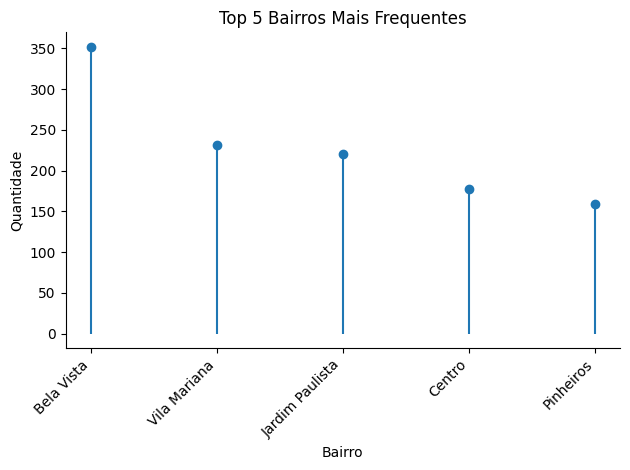

In [ ]:
plt.stem(bairros['district'], bairros['quantidade'], use_line_collection=True, basefmt=' ')
plt.title('Top 5 Bairros Mais Frequentes')
plt.xlabel("Bairro")
plt.ylabel("Quantidade")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
frequenciaBairro = imoveis['district'].value_counts()
bairrosMaisFrequentes = frequenciaBairro.head(5).index.tolist()
novoImoveis = imoveis[imoveis['district'].isin(bairrosMaisFrequentes)]
novoImoveis = novoImoveis.sort_values(by='district', ascending = False)
novoImoveis.head(5)

,address,district,area,bedrooms,garage,type,rent,total
6770,Rua Vergueiro,Vila Mariana,22.0,1,0,Apartamento,2560,3105
3974,Rua França Pinto,Vila Mariana,57.0,2,0,Apartamento,2462,3447
3644,Rua Jorge Tibiriçá,Vila Mariana,196.0,3,2,Casa,4500,5275
2067,Rua Domingos de Morais,Vila Mariana,32.0,1,0,Apartamento,3380,3974
3848,Rua Carlos Petit,Vila Mariana,38.0,1,0,Apartamento,3900,4680


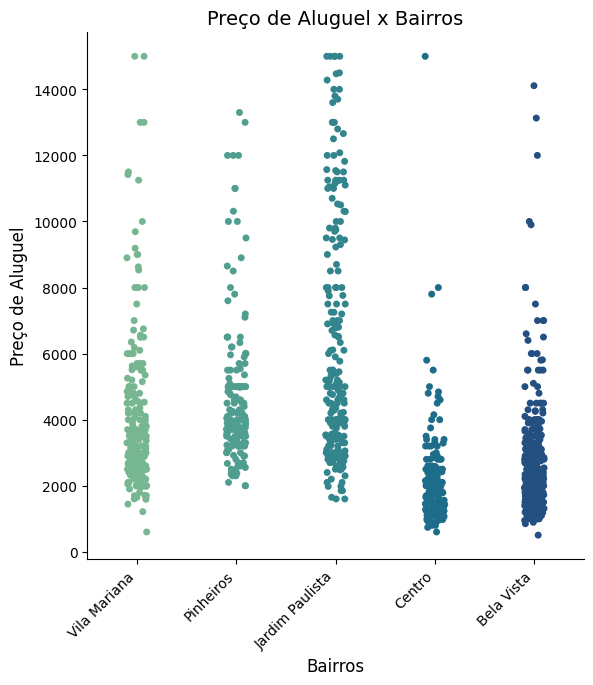

In [ ]:
graficoAluguelVsBairros = sns.catplot(data=novoImoveis, x="district", y="rent", palette='crest', height=6)
plt.xlabel("Bairros", fontsize=12)
plt.ylabel("Preço de Aluguel", fontsize=12)
plt.title("Preço de Aluguel x Bairros", fontsize=14)
graficoAluguelVsBairros.set_xticklabels(rotation=45, ha='right')
plt.show()

**Podemos ver que os bairros possuem aluguéis acessíveis até os mais caros, salvo o centro que os preços são mais baixos, com poucos outliers. O distrito mais bem distribuído é o Jardim Paulista. Podemos verificar essa observação através do desvio padrão.**

In [ ]:
novoImoveis.describe()

,area,bedrooms,garage,rent,total
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,68.363716,1.609991,0.716039,3847.617003,4986.569676
std,53.289988,0.837418,0.773461,2783.581918,3599.352751
min,11.000000,0.000000,0.000000,504.000000,556.000000
25%,34.000000,1.000000,0.000000,2050.000000,2681.000000
50%,50.000000,1.000000,1.000000,3000.000000,3895.000000
75%,80.000000,2.000000,1.000000,4500.000000,5864.000000
max,383.000000,6.000000,5.000000,15000.000000,22990.000000


In [ ]:
outlierCentro = imoveis[(imoveis['district'] == 'Centro') & (imoveis['rent'] > 10000)]
outlierCentro

,address,district,area,bedrooms,garage,type,rent,total
8513,Rua Major Quedinho,Centro,150.0,2,2,Apartamento,15000,18140


In [ ]:
perc = imoveis[imoveis['district'] == 'Centro']
rent_centro = perc['rent']

In [ ]:
percentiles = [np.percentile(rent_centro, 25),
               np.percentile(rent_centro, 50),
               np.percentile(rent_centro, 75),
               np.percentile(rent_centro, 99),
               np.percentile(rent_centro, 100)]

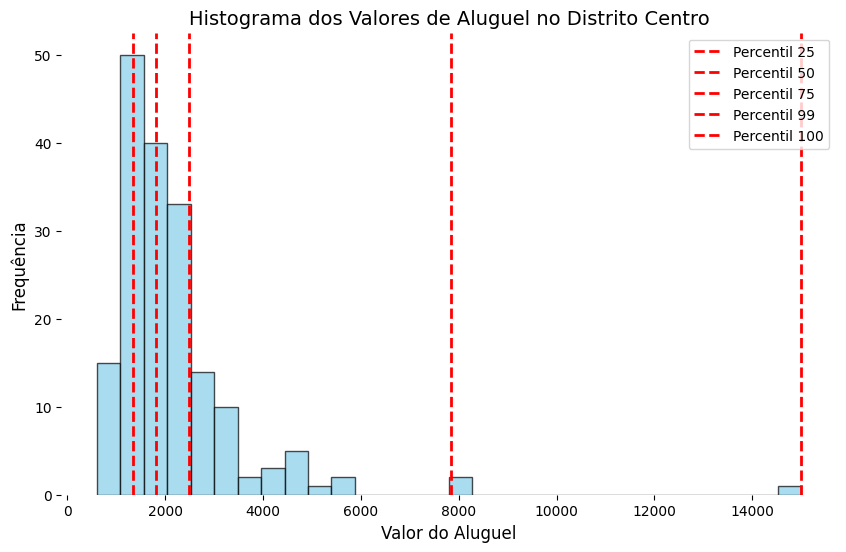

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(rent_centro, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

for percentile in percentiles:
    plt.axvline(x=percentile, color='red', linestyle='--', linewidth=2)

plt.xlabel('Valor do Aluguel', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Histograma dos Valores de Aluguel no Distrito Centro', fontsize=14)
plt.legend(['Percentil 25', 'Percentil 50', 'Percentil 75', 'Percentil 99', 'Percentil 100'])
plt.box(False)
plt.show()

### <center><font size="+3" color="blue"><b>Tipo</b></font></center>

In [ ]:
dfTipo = imoveis['type'].value_counts().reset_index()
dfTipo.rename(columns={'index': 'tipo'}, inplace=True)
dfTipo.rename(columns={'type': 'contagem'}, inplace=True)
dfTipo.head()

,tipo,contagem
0,Apartamento,7194
1,Casa,2841
2,Studio e kitnet,1381
3,Casa em condomínio,241


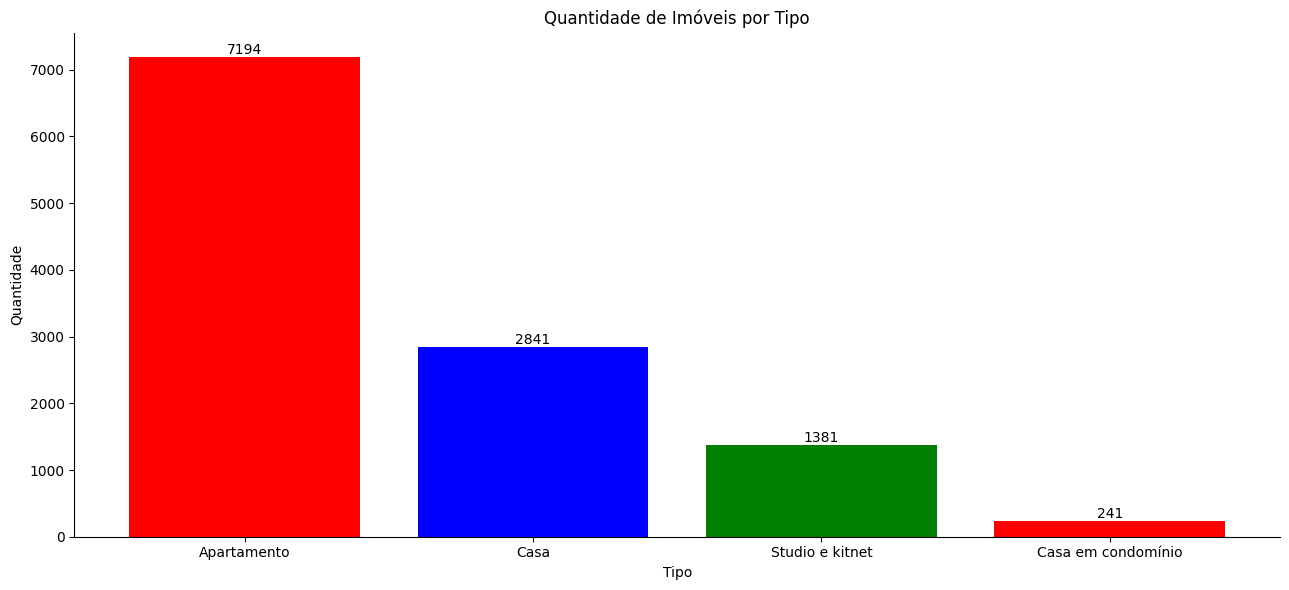

In [ ]:
plt.figure(figsize=(13, 6))

plt.bar(dfTipo['tipo'], dfTipo['contagem'], color=cores)

for index, value in enumerate(dfTipo['contagem']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title("Quantidade de Imóveis por Tipo")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
tipoTotal = imoveis.groupby('type')['total'].mean().reset_index().sort_values(by='total', ascending = False)
tipoTotal['total'] = tipoTotal['total'].round(0).astype(int)
tipoTotal.head()

,type,total
2,Casa em condomínio,4576
0,Apartamento,4435
1,Casa,3824
3,Studio e kitnet,2668


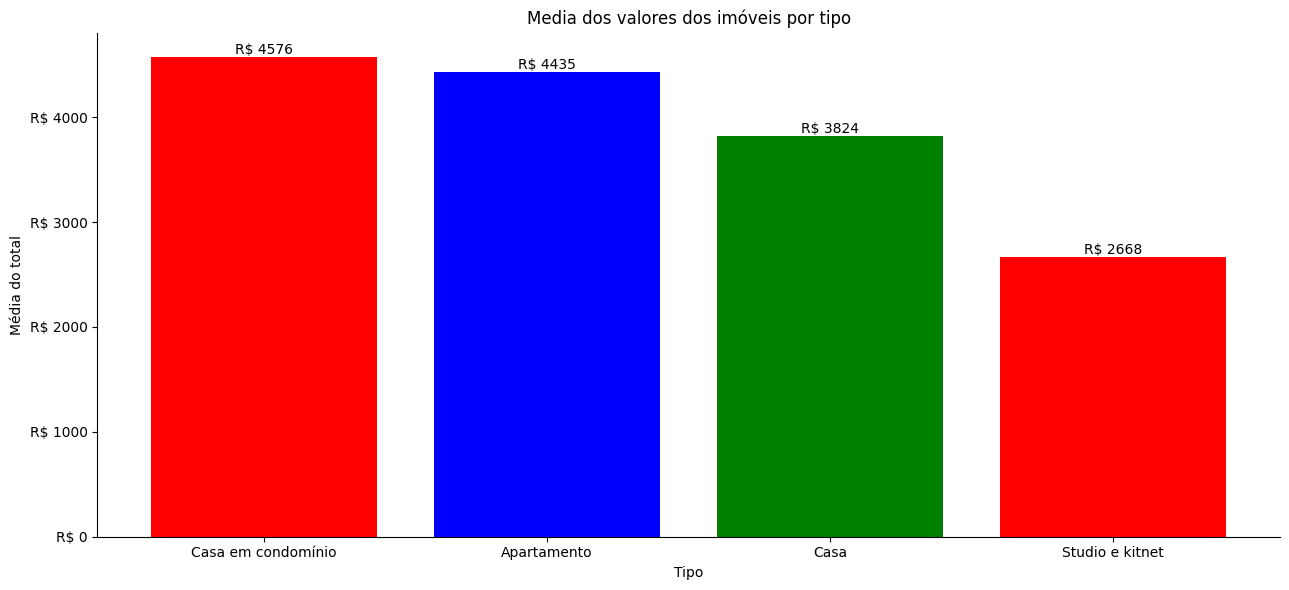

In [ ]:
plt.figure(figsize=(13, 6))

plt.bar(tipoTotal['type'], tipoTotal['total'], color=cores)

for index, value in enumerate(tipoTotal['total']):
    plt.text(index, value, f"R$ {value}", ha='center', va='bottom')

plt.xlabel('Tipo')
plt.ylabel('Média do total')
plt.title("Media dos valores dos imóveis por tipo")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"R$ {int(x)}"))
plt.tight_layout()
plt.show()

In [ ]:
imoveis[imoveis['type'] == 'Apartamento'].describe()

,area,bedrooms,garage,rent,total
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,73.328051,1.987907,1.022519,3356.902697,4435.428413
std,50.852633,0.798472,0.896132,2638.994113,3496.018200
min,10.000000,0.000000,0.000000,567.000000,686.000000
25%,45.000000,1.000000,0.000000,1700.000000,2266.000000
50%,60.000000,2.000000,1.000000,2500.000000,3293.000000
75%,81.000000,2.000000,1.000000,3899.750000,5158.750000
max,568.000000,6.000000,6.000000,15000.000000,28700.000000


In [ ]:
tipo = imoveis.groupby('garage')['total'].mean().reset_index()
tipo = tipo.sort_values('garage')

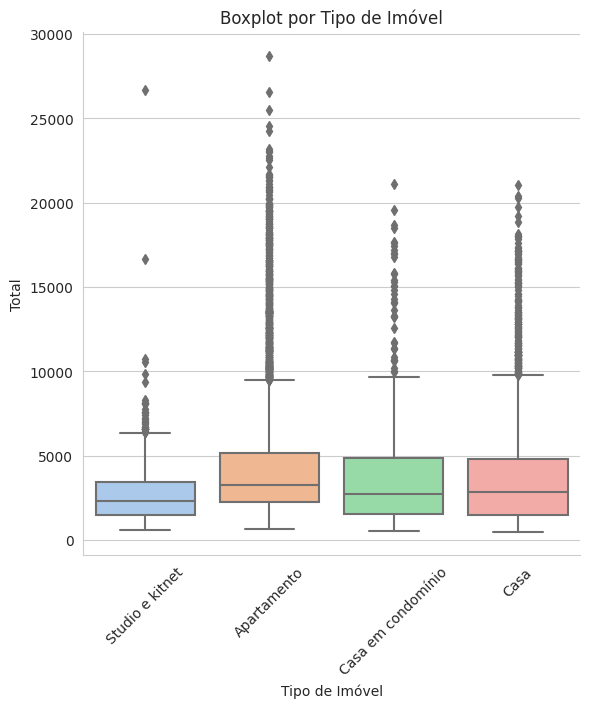

In [ ]:
sns.set_style("whitegrid")
graficoTipo = sns.catplot(data=imoveis, x="type", y="total", kind="box", height=6, palette="pastel")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Total")
plt.title("Boxplot por Tipo de Imóvel")
plt.xticks(rotation=45)
plt.show()

### <center><font size="+3" color="blue"><b>Erro?</b></font></center>

In [ ]:
imoveis[(imoveis['type'] == 'Apartamento') & (imoveis['bedrooms'] == 0)]

,address,district,area,bedrooms,garage,type,rent,total
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30.0,0,0,Apartamento,1840,2113
1002,Rua Natividade Saldanha,São Lucas,28.0,0,0,Apartamento,1100,1391
1416,Rua Natividade Saldanha,São Lucas,27.0,0,0,Apartamento,1100,1387
1552,Rua Natividade Saldanha,São Lucas,40.0,0,0,Apartamento,1300,1706
1595,Rua Natividade Saldanha,São Lucas,45.0,0,0,Apartamento,1400,1855
1925,Rua Santa Lúcia,Cidade Mãe do Céu,22.0,0,0,Apartamento,1000,1263
9674,Rua Adalberto Kemeny,Parque Industrial Tomas Edson,47.0,0,1,Apartamento,2330,3190


### <center><font size="+3" color="blue"><b>Garagem</b></font></center>







In [ ]:
imoveis['garage_and_bedrooms'] = np.where((imoveis['bedrooms'] > 0) & (imoveis['garage'] > 0), 1, 0)
imoveis.head()

,address,district,area,bedrooms,garage,type,rent,total,garage_and_bedrooms
0,Rua Herval,Belenzinho,21.0,1,0,Studio e kitnet,2400,2939,0
1,Avenida São Miguel,Vila Marieta,15.0,1,1,Studio e kitnet,1030,1345,1
2,Rua Oscar Freire,Pinheiros,18.0,1,0,Apartamento,4000,4661,0
3,Rua Júlio Sayago,Vila Ré,56.0,2,2,Casa em condomínio,1750,1954,1
4,Rua Barata Ribeiro,Bela Vista,19.0,1,0,Studio e kitnet,4000,4654,0


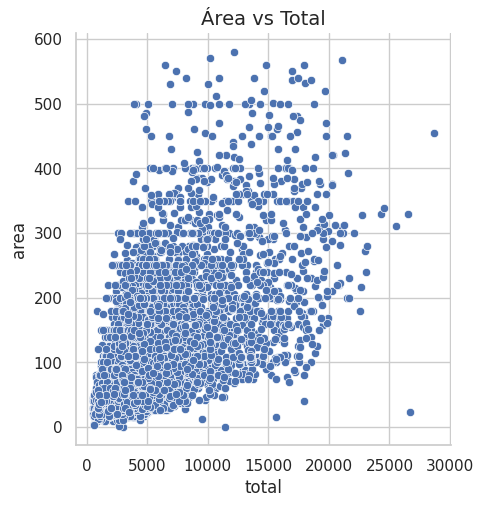

In [ ]:
sns.set(style="whitegrid")
graficoArea = sns.relplot(data=imoveis, x="total", y="area", height=5, palette='viridis')
plt.title('Área vs Total', fontsize=14)
plt.show()

In [ ]:
totalAcima = imoveis[imoveis['total'] > 25000]
totalAcima

,address,district,area,bedrooms,garage,type,rent,total,garage_and_bedrooms
6095,Avenida Chibarás,Planalto Paulista,24.0,1,0,Studio e kitnet,25000,26710,0
9950,Rua Joaquim José Esteves,Santo Amaro,329.0,4,3,Apartamento,15000,26550,1
10093,Rua Edson,Campo Belo,311.0,4,6,Apartamento,15000,25510,1
10144,Alameda dos Tupiniquins,Planalto Paulista,454.0,4,5,Apartamento,15000,28700,1


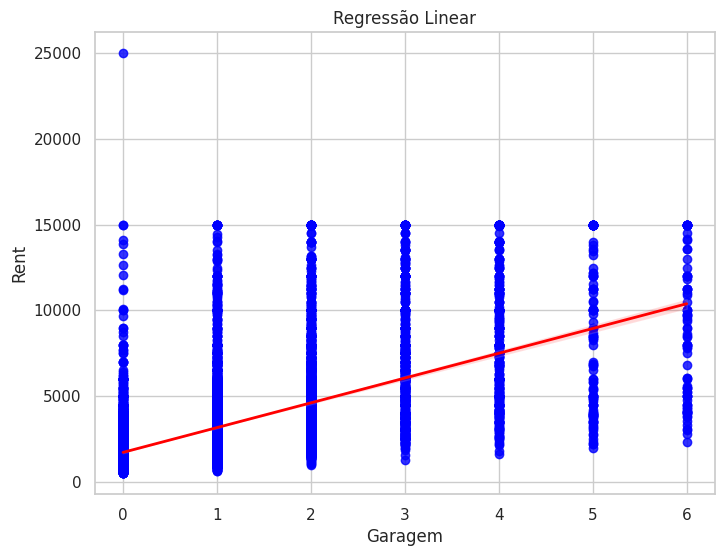

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x="garage", y="rent", data=imoveis, scatter_kws={"color": "blue"}, line_kws={"color": "red", "linewidth": 2})
plt.xlabel('Garagem')
plt.ylabel('Rent')
plt.title('Regressão Linear')
plt.grid(True)
plt.show()

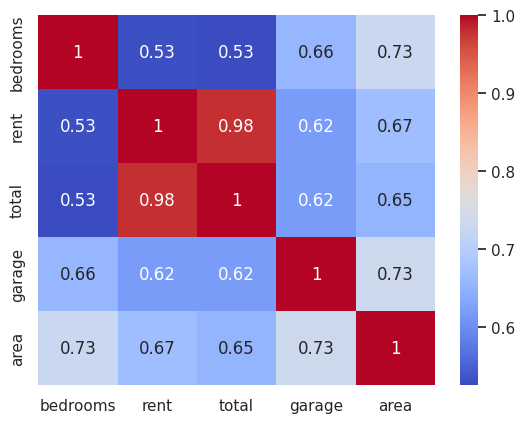

In [ ]:
sub = imoveis[['bedrooms', 'rent', 'total', 'garage', 'area']]

cor_matrix = sub.corr()

sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

plt.show()

### <center><font size="+3" color="blue"><b>Despesa</b></font></center>

In [ ]:
imoveis['despesa'] = imoveis['total'] - imoveis['rent']

<Axes: xlabel='despesa', ylabel='Count'>

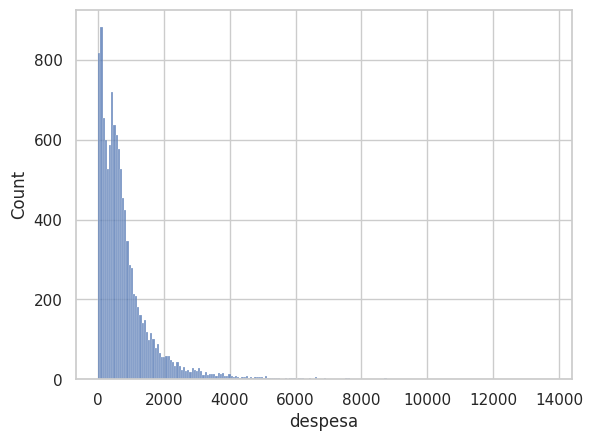

In [ ]:
sns.histplot(data = imoveis, x='despesa')